In [1]:
import numpy as np

docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<OOV>')    # out of vocabulary 

In [3]:
tokenizer.fit_on_texts(docs)    

In [4]:
tokenizer.word_index

{'<OOV>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [5]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [6]:
tokenizer.word_docs

defaultdict(int,
            {'india': 3,
             'go': 1,
             'hip': 1,
             'hurray': 1,
             'bhai': 1,
             'jeetega': 1,
             'ki': 2,
             'jai': 2,
             'bharat': 1,
             'mata': 1,
             'kohli': 1,
             'sachin': 1,
             'dhoni': 1,
             'modi': 1,
             'ji': 1,
             'inquilab': 1,
             'zindabad': 1})

In [7]:
tokenizer.document_count

10

In [10]:
seq = tokenizer.texts_to_sequences(docs)    

In [11]:
from keras.utils import pad_sequences

In [12]:
seq = pad_sequences(seq, padding='post')    

In [13]:
seq

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]])

In [14]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [15]:
(x_train,y_train),(x_test,y_test) = imdb.load_data() 

In [20]:
len(x_train[2])

141

In [21]:
len(x_train[3]) 

550

In [22]:
x_train = pad_sequences(x_train, padding='post', maxlen=50)    
x_test = pad_sequences(x_test, padding='post', maxlen=50)  

In [23]:
x_train.shape

(25000, 50)

In [24]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(50,1), return_sequences=False))
model.add(Dense(1, activation='sigmoid')) 

c:\Users\ASUS\Miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])       

In [30]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))  

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5177 - loss: 0.6915 - val_accuracy: 0.5066 - val_loss: 0.6955
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.5076 - val_loss: 0.6947
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5003 - loss: 0.6930 - val_accuracy: 0.5028 - val_loss: 0.6941
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5016 - loss: 0.6924 - val_accuracy: 0.5064 - val_loss: 0.6941
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5110 - loss: 0.6920 - val_accuracy: 0.5032 - val_loss: 0.6939
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5091 - loss: 0.6922 - val_accuracy: 0.5079 - val_loss: 0.6955
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5046 - loss: 0.6924 - val_accuracy: 0.5073 - val_loss: 0.6949
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4987 - loss: 0.6919 - val_accuracy: 0.

In [33]:
import matplotlib.pyplot as plt

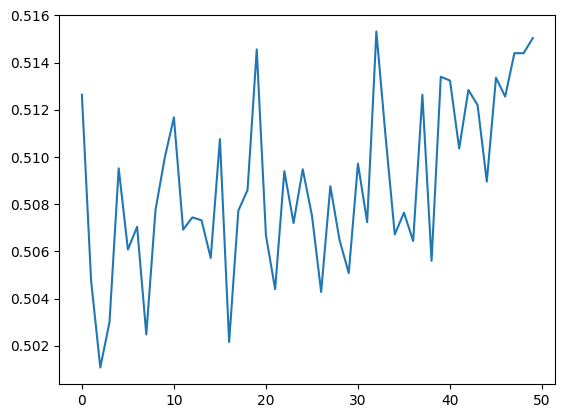

In [34]:
plt.plot(model.history.history['accuracy']) 

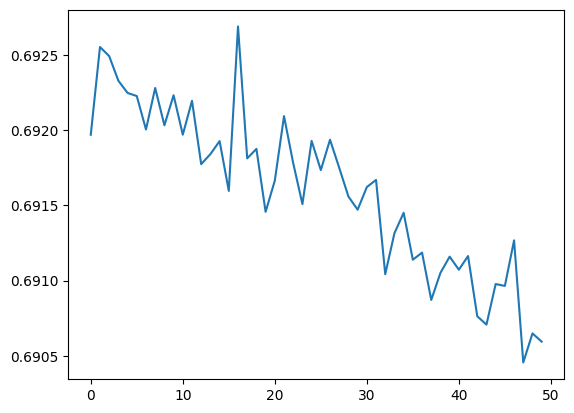

In [35]:
plt.plot(model.history.history['loss']) 